# ACDC dataset

We visualize 1 sequence and its corresponding template using average.

In [166]:
import torch
import datasets as datasets
import matplotlib.pyplot as plt

In [167]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "validation", max_seq_len=15)
seq1, template = train_dataset[10]

In [168]:
cuda_to_use = 0
seq2 = seq1[None].to(cuda_to_use)

In [169]:
assert seq1.all() == seq2.all()

This is 1 sequence


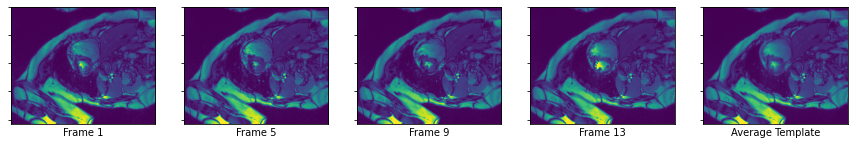

In [170]:
print("This is 1 sequence")
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 1
j = 1
for i in range(1, columns*rows +1):
    if (j == 17):
        fig.add_subplot(rows, columns, i)
        plt.imshow(template[0,:,:])
        plt.xlabel("Average Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
        break
    fig.add_subplot(rows, columns, i)
    plt.imshow(seq1[j,:,:])
    plt.xlabel("Frame " + str(j))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
    j += 4

        
plt.show()

This is the corresponding template


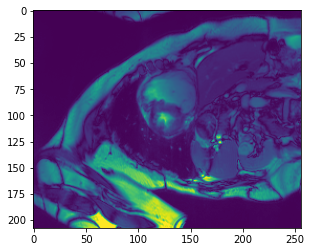

In [171]:
print("This is the corresponding template")
plt.imshow(template[0,:,:])


## Data Exploration - Range of image intensity

In [175]:
for i in range(0, len(train_dataset)):
    seq1, _ = train_dataset[i]
    len_seq, H, W = seq1.shape
    min_it = 1000
    max_it = 0
    for s in range(0, len_seq):
        for h in range(0, H):
            for w in range(0, W):
                if (seq1[s, h, w] < min_it):
                    min_it = seq1[s, h, w]
                if (seq1[s, h, w] > max_it):
                    max_it = seq1[s, h, w]
    print("Range of intensity of pixels in seq", i, "is [", min_it.item(), ",", max_it.item(), "].")
            

Range of intensity of pixels in seq 0 is [ 0.0 , 591.0 ].
Range of intensity of pixels in seq 1 is [ 0.0 , 2477.0 ].
Range of intensity of pixels in seq 2 is [ 0.0 , 2461.0 ].
Range of intensity of pixels in seq 3 is [ 0.0 , 1417.0 ].
Range of intensity of pixels in seq 4 is [ 0.0 , 1233.0 ].
Range of intensity of pixels in seq 5 is [ 9.0 , 255.0 ].
Range of intensity of pixels in seq 6 is [ 6.0 , 255.0 ].
Range of intensity of pixels in seq 7 is [ 0.0 , 602.0 ].
Range of intensity of pixels in seq 8 is [ 0.0 , 1206.0 ].
Range of intensity of pixels in seq 9 is [ 0.0 , 517.0 ].
Range of intensity of pixels in seq 10 is [ 8.0 , 255.0 ].
Range of intensity of pixels in seq 11 is [ 7.0 , 255.0 ].
Range of intensity of pixels in seq 12 is [ 15.0 , 255.0 ].
Range of intensity of pixels in seq 13 is [ 9.0 , 255.0 ].
Range of intensity of pixels in seq 14 is [ 0.0 , 446.0 ].
Range of intensity of pixels in seq 15 is [ 0.0 , 643.0 ].
Range of intensity of pixels in seq 16 is [ 0.0 , 864.0 ].
R

KeyboardInterrupt: 

In [9]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
    

<class 'numpy.ndarray'>


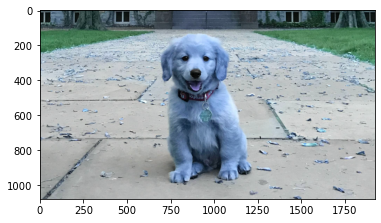

In [10]:
img = cv2.imread('dog.jpeg') #you can use any image you want.

print(type(img))
plt.imshow(img)

In [11]:
blue,green,red = cv2.split(img) 
#initialize PCA with first 20 principal components
pca = PCA(20)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)  #principalComponents 
red_inverted = pca.inverse_transform(red_transformed)

In [12]:
print(img.shape)
print(red_transformed.shape)
print(red_inverted.shape)

(1080, 1920, 3)
(1080, 20)
(1080, 1920)


In [13]:
train_dataset = datasets.ACDCDataset("../datasets/ACDC_processed/", "training", max_seq_len=15)
seq, template = train_dataset[150]
print(seq.shape)

torch.Size([15, 200, 256])


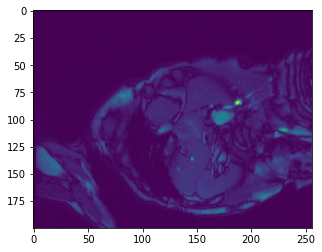

In [14]:
plt.imshow(seq[4,:,:].numpy())

seq_n.shape (15, 200, 256)
flat_imgs.shape (15, 51200)
flat_imgs.shape (51200, 15)


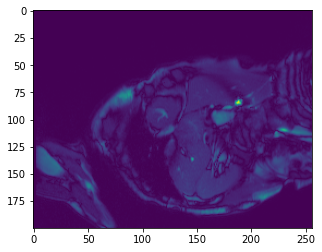

In [15]:
seq_n = seq.numpy()
print("seq_n.shape", seq_n.shape)
flat_imgs = np.zeros((seq_n.shape[0], seq_n.shape[1]*seq_n.shape[2]))

for i in range(0, seq_n.shape[0]):
    flat_imgs[i] = seq_n[i,:,:].flatten()
print("flat_imgs.shape", flat_imgs.shape)
flat_imgs = np.transpose(flat_imgs)
print("flat_imgs.shape", flat_imgs.shape)
plt.imshow(np.reshape(flat_imgs[:,0], (seq_n.shape[1],seq_n.shape[2])))

In [16]:
#pca = PCA(n_components=0.99, svd_solver='full')
pca = PCA(9)
 
#Applying to red channel and then applying inverse transform to transformed array.
flat_imgs_transformed = pca.fit_transform(flat_imgs) #principalComponents
#flat_imgs_inverted = pca.inverse_transform(flat_imgs_transformed)
print(flat_imgs_transformed.shape)
print(pca.n_components_)

sing_all = pca.singular_values_.sum()
print("Percentage of singular values")
print(pca.singular_values_)
for i in range(0, 15):
    print("{:.2f}".format(pca.singular_values_[:i+1].sum() * 100 / sing_all), "%")


(51200, 9)
9
Percentage of singular values
[110909.6203892    9113.46632434   6992.6722014    3967.15294264
   3164.07186227   2481.28355059   2228.8113478    2042.04817603
   1898.40925515]
77.67 %
84.05 %
88.95 %
91.73 %
93.94 %
95.68 %
97.24 %
98.67 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %
100.00 %


In [17]:
print(pca.explained_variance_)

[2.40257503e+05 1.62220490e+03 9.55047257e+02 3.07394724e+02
 1.95538013e+02 1.20251725e+02 9.70253330e+01 8.14461367e+01
 7.03911737e+01]


(51200,)


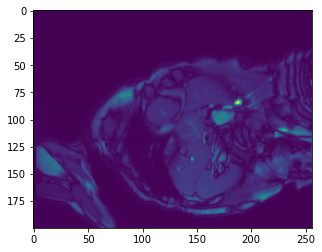

In [18]:
img = np.zeros((51200))
for j in range(0, 2):
    img += pca.singular_values_[j] * flat_imgs_transformed[:,j]
print(img.shape)
template = img.reshape(seq_n.shape[1],seq_n.shape[2])
plt.imshow(template)


In [145]:
from sklearn.preprocessing import StandardScaler

def construct_template_pca(seq, lvl_conf):
    '''seq is a tensor with shape [B, N, H, W]'''
    b, s_len, h, w = seq.shape
    assert b == 1
    seq = seq[0,:,:,:].numpy() #[N, H, W]
    # Flatten the images in the seq 
    seq_flat = np.zeros((s_len, h*w)) # [5000, 15]

    for i in range(0, s_len):
        seq_flat[i] = seq[i,:,:].flatten()
    seq_flat = np.transpose(seq_flat) #[h*w, s], each col represents an image
    sc = StandardScaler()
    seq_flat = sc.fit_transform(seq_flat)
    
    #pca = PCA(n_components=lvl_conf, svd_solver='full')
    pca = PCA(s_len)
    
    seq_flat_transformed = pca.fit_transform(seq_flat)
    template = seq_flat_transformed[:,0].reshape(h, w)
    #print(pca.explained_variance_ratio_[0])
    assert pca.explained_variance_ratio_[0] > 0.79, print(pca.explained_variance_ratio_[0])
    return torch.tensor(template)

In [146]:
tmp = construct_template_pca(seq1.view(1,seq1.shape[0], seq1.shape[1], seq1.shape[2]), 0.9)

This is 1 sequence


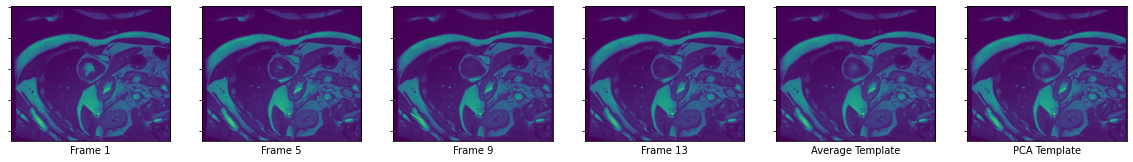

In [165]:
print("This is 1 sequence")
seq1, template = train_dataset[40]
tmp = construct_template_pca(seq1.view(1,seq1.shape[0], seq1.shape[1], seq1.shape[2]), 0.9)

fig = plt.figure(figsize=(20, 20))
columns = 6
rows = 1
j = 1
for i in range(1, columns*rows +1):
    if (j == 17):
        fig.add_subplot(rows, columns, i)
        plt.imshow(template[0,:,:])
        plt.xlabel("Average Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
        j += 4
        continue
    if (j == 21):
        fig.add_subplot(rows, columns, i)
        plt.imshow(tmp)
        plt.xlabel("PCA Template")
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False)
        j += 4
        break
        
    fig.add_subplot(rows, columns, i)
    plt.imshow(seq1[j,:,:])
    plt.xlabel("Frame " + str(j))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False,  labelleft=False) 
    j += 4

        
plt.show()

In [164]:
assert tmp.all() != template[0,:,:].all()

In [159]:
v_l = []
for i in range(0, len(train_dataset)):
    seq, _ = train_dataset[i]
    v, tmp = construct_template_pca(seq.view(1,seq.shape[0], seq.shape[1], seq.shape[2]), 0.9)
    v_l.append(v)

ValueError: too many values to unpack (expected 2)

In [94]:
count = {}
for i in range(0, len(train_dataset)):
    count[v_l[i]] = 0
for i in range(0, len(train_dataset)):
    count[v_l[i]] += 1
count = dict(sorted(count.items()))
C, V = [], []
for key, value in count.items():
    print(key)
    C.append(value)
    V.append(key)

0.79
0.84
0.85
0.86
0.88
0.89
0.90
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99
1.00


Text(0, 0.5, 'Count')

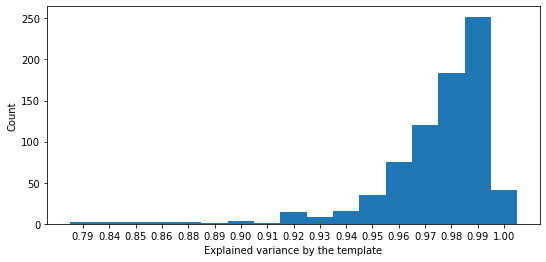

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 4))
plt.subplot(131)

plt.bar(V, C, width=1)
plt.xlabel('Explained variance by the template')
plt.ylabel('Count')

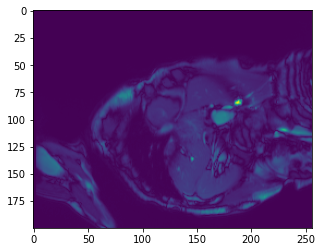

In [39]:
plt.imshow(tmp)


In [21]:
'''
    print("n_com_", pca.n_components_)

    template = np.zeros((h * w))
    for j in range(0, pca.n_components_):
        template += pca.singular_values_[j] * seq_flat_transformed[:,j] # CHECK
        
    template = template.reshape(h, w)
    return torch.tensor(template)
'''

'\n    print("n_com_", pca.n_components_)\n\n    template = np.zeros((h * w))\n    for j in range(0, pca.n_components_):\n        template += pca.singular_values_[j] * seq_flat_transformed[:,j] # CHECK\n        \n    template = template.reshape(h, w)\n    return torch.tensor(template)\n'

seq_flat.shape (51200, 15)
seq_flat_transformed.shape (51200, 9)
n_com_ 9
(9, 15)
9 (9,) (51200, 2) (9, 15)
-39349391.77975766 0.0


AssertionError: 

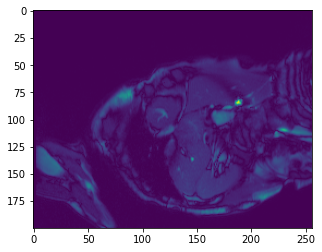

In [24]:
dog_seq = seq[0,:,:].repeat(15, 1, 1)
assert dog_seq[0,:,:].all() == seq[0,:,:].all()
dog_tmp = construct_template_pca(dog_seq.view(1,dog_seq.shape[0], dog_seq.shape[1], dog_seq.shape[2]), 1)
plt.imshow(dog_tmp)
print(dog_tmp[0,0], seq[0,0,0].numpy())
assert dog_tmp[0,0].all() == seq[0,0,0].numpy().all()